<a href="https://colab.research.google.com/github/tanyakhan123/leapyear/blob/master/Tanya_Final_Project_Template.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Template

This is just a template with some stuff you will need for your final project. Feel free to copy it to your drive and change whatever you want!

# Data

In [ ]:
import tensorflow as tf
import numpy as np
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

labels = np.concatenate((train_labels, test_labels))
classes = ["airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", 
           "ship", "truck"]
class_names = np.unique(labels)

print(train_images.shape)
print(test_images.shape)

170500096/170498071 [==============================] - 4s 0us/step
(50000, 32, 32, 3)
(10000, 32, 32, 3)


# Custom Class

In [ ]:
from tensorflow.keras import layers
class SharedWeightsConv(tf.keras.layers.Layer):
    def __init__(
            self,
            parent,
            strides=None,
            padding=None,
            dilation_rate=None,
            activation=None,
            **kwargs
        ):
        # We want to check if the input is indeed a TF Convolutional Layer
        conv_classes = (
            layers.Conv1D,
            layers.Conv2D,
            layers.Conv3D
        )
        if not any(isinstance(parent, cls) for cls in conv_classes):
            raise TypeError("'parent' should be a keras convolution layer.")
        # Initialize tf.keras.layers.Layer object    
        super().__init__(**kwargs)
        self.parent = parent
        self.rank = parent.rank # The Convolution dimension ie. 1D, 2D, 3D
        self.activation = (
            # We want to use the parent's activation function
            # if the user doesn't pass in a custom activation function
            parent.activation if activation is None
            else tf.keras.activations.get(activation)
        )
        cnn_kwargs = {
            'strides': strides,
            'padding': padding,
            'data_format': None,
            'dilation_rate': dilation_rate,
        }
        self.cnn_kwargs = {
            key: getattr(parent, key) if value is None else value\
            for key, value in cnn_kwargs.items()
        }
        self.built = self.parent.built
        self.cnn_op = {
            1: tf.keras.backend.conv1d,
            2: tf.keras.backend.conv2d,
            3: tf.keras.backend.conv3d
        }.get(self.rank)

    def build(self, input_shape):
        if not self.built:
            self.parent.build(input_shape)
        self.built = True

    def call(self, inputs):  # adapted from Conv parent layer
        if self.cnn_kwargs['padding'] == 'causal' and self.rank == 1:
            inputs = tf.pad(inputs, self._compute_causal_padding())
        outputs = self.cnn_op(inputs, self.parent.kernel, **self.cnn_kwargs)
        if self.parent.use_bias:
            if self.cnn_kwargs['data_format'] == 'channels_first':
                if self.rank == 1:
                    shape = (1, self.parent.filters, 1)
                    outputs += tf.reshape(self.parent.bias, shape)
                else:
                    outputs = tf.nn.bias_add(
                        outputs, self.parent.bias, data_format='NCHW'
                    )
            else:
                outputs = tf.nn.bias_add(
                    outputs, self.parent.bias, data_format='NHWC'
                )
        if self.activation is not None:
            return self.activation(outputs)
        return outputs

    def _compute_causal_padding(self):  # adapted from Conv parent layer
        left_pad = self.cnn_kwargs['dilation_rate'][0]
        left_pad *= (self.parent.kernel_size[0] - 1)
        if self.cnn_kwargs['data_format'] == 'channels_last':
          causal_padding = [[0, 0], [left_pad, 0], [0, 0]]
        else:
          causal_padding = [[0, 0], [0, 0], [left_pad, 0]]
        return causal_padding

# Model

in case you want to use functional API instead of sequential here is an input node

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten
((train_images, train_labels), (test_images, test_labels)) = datasets.cifar10.load_data()

print(train_images.shape)
# This line here concatenates the train and test labels into one array
labels = np.concatenate((train_labels, test_labels))

# CHANGE THE CODE BELOW, USE NP.UNIQUE
uniques, counts  = np.unique(labels, return_counts=True)
print(uniques)
print(counts)
classes = ["airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"]

train_labels = tf.keras.utils.to_categorical(train_labels)
test_labels = tf.keras.utils.to_categorical(test_labels)






# inputs = tf.keras.Input(shape=(32, 32, 3), name="img")

# AlexNet model
# class AlexNet(Sequential):
#     def __init__(self, input_shape, num_classes):
#         super().__init__()

#         self.add(Conv2D(96, kernel_size=(11,11), strides= 4,
#                         padding= 'valid', activation= 'sigmoid',
#                         input_shape= input_shape,
#                         kernel_initializer= 'he_normal'))
        
#         self.add(MaxPooling2D(pool_size=(3,3), strides= (2,2),
#                               padding= 'valid', data_format= None))

#         self.add(Conv2D(256, kernel_size=(5,5), strides= 1,
#                         padding= 'same', activation= 'sigmoid',
#                         kernel_initializer= 'he_normal'))
#         # self.add(MaxPooling2D(pool_size=(3,3), strides= (2,2),
#         #                       padding= 'valid', data_format= None)) 

#         self.add(Conv2D(384, kernel_size=(3,3), strides= 1,
#                         padding= 'same', activation= 'sigmoid',
#                         kernel_initializer= 'he_normal'))

#         self.add(Conv2D(384, kernel_size=(3,3), strides= 1,
#                         padding= 'same', activation= 'sigmoid',
#                         kernel_initializer= 'he_normal'))

#         self.add(Conv2D(256, kernel_size=(3,3), strides= 1,
#                         padding= 'same', activation= 'sigmoid',
#                         kernel_initializer= 'he_normal'))

#         # self.add(MaxPooling2D(pool_size=(3,3), strides= (2,2),
#         #                       padding= 'valid', data_format= None))
#         parent_layer = layers.Conv2D(32, (3, 3), activation='relu')
#         child_layer = SharedWeightsConv(parent_layer)
#         self.add(parent_layer)
#         self.add(child_layer)
#         self.add(Flatten())
#         self.add(Dense(4096, activation= 'sigmoid'))
#         self.add(Dense(4096, activation= 'sigmoid'))
#         self.add(Dense(1000, activation= 'sigmoid'))
#         self.add(Dense(num_classes, activation= 'softmax'))

        

#         self.compile(optimizer= tf.keras.optimizers.Adam(0.0003),
#                     loss='categorical_crossentropy',
#                     metrics=['accuracy'])
        
# model = AlexNet((32, 32, 3), 10)
# model.summary()




(50000, 32, 32, 3)
[0 1 2 3 4 5 6 7 8 9]
[6000 6000 6000 6000 6000 6000 6000 6000 6000 6000]


Model: "toy_resnet"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
img (InputLayer)                [(None, 32, 32, 3)]  0                                            
__________________________________________________________________________________________________
conv2d_21 (Conv2D)              (None, 30, 30, 32)   896         img[0][0]                        
__________________________________________________________________________________________________
conv2d_22 (Conv2D)              (None, 28, 28, 64)   18496       conv2d_21[0][0]                  
__________________________________________________________________________________________________
max_pooling2d_4 (MaxPooling2D)  (None, 9, 9, 64)     0           conv2d_22[0][0]                  
_________________________________________________________________________________________

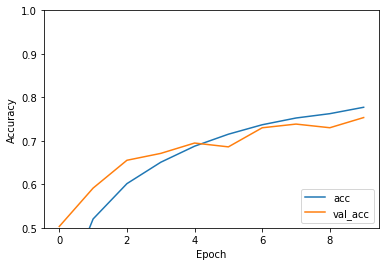

In [ ]:
# block_1_output = layers.MaxPooling2D(3)(x)
# layer2 = layers.Conv2D(64, 3, activation="relu", padding="same")
# shared_layer2 = SharedWeightsConv(layer2)

# x = layer2(block_1_output)
# x = shared_layer2(x)
# block_2_output = layers.add([x, block_1_output])

import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt

inputs = keras.Input(shape=(32, 32, 3), name="img")
x = layers.Conv2D(32, 3, activation="relu")(inputs)
x = layers.Conv2D(64, 3, activation="relu")(x)
block_1_output = layers.MaxPooling2D(3)(x)

layer1 = layers.Conv2D(64, 3, activation="relu", padding="same")
shared_layer1 = SharedWeightsConv(layer1)
x = layer1(block_1_output)
x = layers.Conv2D(64, 3, activation="relu", padding="same")(x)
block_2_output = layers.add([x, block_1_output])

x = layers.Conv2D(64, 3, activation="relu", padding="same")(block_2_output)
x = layers.Conv2D(64, 3, activation="relu", padding="same")(x)
block_3_output = layers.add([x, block_2_output])

x = shared_layer1(block_3_output)
x = layers.GlobalAveragePooling2D()(x)
x = layers.Dense(256, activation="relu")(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(10)(x)

model = keras.Model(inputs, outputs, name="toy_resnet")
model.summary()

model.compile(
    optimizer=keras.optimizers.RMSprop(1e-3),
    loss=keras.losses.CategoricalCrossentropy(from_logits=True),
    metrics=["acc"],
)
# We restrict the data to the first 1000 samples so as to limit execution time
# on Colab. Try to train on the entire dataset until convergence!
model_history = model.fit(train_images, train_labels, batch_size=64, epochs=10, validation_split=0.2)

keras.utils.plot_model(model, "mini_resnet1.png", show_shapes=True)

plt.plot(model_history.history['acc'], label='acc')
plt.plot(model_history.history['val_acc'], label = 'val_acc')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)


In [ ]:
print(train_images.shape, train_labels.shape)

(50000, 32, 32, 3) (50000, 10)


In [ ]:
# history = model.fit(train_images, train_labels, epochs=10)